# Task 1 - Machine Learning




# Introduction:

Dataset Choice: "Students Performance in Exams" from Kaggle

Education is a vital area for the development and progress of society. Understanding the factors that affect students' performance in exams is crucial to ensure that all students receive a quality education and have equal opportunities for academic success. In this context, the "Students Performance in Exams" dataset from Kaggle provides an opportunity to explore and analyze students' performance through advanced Machine Learning techniques.

This dataset contains comprehensive information about students, including demographic details such as gender, race/ethnicity, and parents' level of education, as well as scores in mathematics, reading, and writing exams. By applying machine learning methods to this data, I will be able to identify complex patterns and relationships among variables that can help us better understand the determinants of students' academic success.

In this project, I will explore machine learning techniques to predict students' performance based on their demographic characteristics and other relevant factors. Ultimately, I hope to gain insights that can inform educational policies and practices, as well as guide interventions aimed at improving students' performance and well-being.

# IMPORTANDO LIBRARIES

New libraries can be inserted throughout the project if necessary.

In [485]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, ttest_ind, chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


# pip install seaborn


# DATA CHARACTERIZATION

# Load the Dataset

In [486]:
dataframe = pd.read_csv('StudentsPerformance.csv')
pd_student=pd.read_csv('StudentsPerformance.csv')

In [487]:
pd_student.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [488]:
print(pd_student.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [489]:
pd_student.shape

(1000, 8)

In [490]:
pd_student.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# PRE - PROCESSAMENTO

# Creating New Variables:

During the analysis of the "Students Performance in Exams" dataset, I chose to create new variables such as "Total Score" and "Average Scores." These new variables were added with the aim of providing more comprehensive and informative measures of students' academic performance.

The "Total Score" variable was created by summing the individual scores of students in all subjects, including Mathematics, Reading, and Writing. Adding this variable allows for a holistic assessment of each student's overall academic performance, capturing their abilities across various areas of the school curriculum.

The "Average Scores" variable was calculated by obtaining the arithmetic mean of the scores in all subjects for each student. This average provides a smoother and more balanced measure of academic performance, taking into account not only performance in a single subject but across all evaluated areas.

These new variables are essential for a more in-depth analysis and a more comprehensive understanding of students' performance in exams. By adding these aggregated measures, we can identify patterns, trends, and discrepancies in students' performance more effectively.

In summary, creating the "Total Score" and "Average Scores" variables enriches the dataset, offering a more comprehensive perspective on students' academic performance and facilitating more detailed and meaningful analyses on the subject.







#Calculating the Total Score: Summing the scores in all subjects for each student and storing the result in a new column. Using the .sum(axis=1) method to sum the scores across columns.

In [491]:
pd_student['Total Score'] = pd_student[['math score', 'reading score', 'writing score']].sum(axis=1)

#Calculating the Average Scores: calculating the average of the scores in all subjects for each student and storing the result in a new column. Using the .mean(axis=1) method to calculate the mean across columns.

In [492]:
pd_student['Average Score'] = pd_student[['math score', 'reading score', 'writing score']].mean(axis=1)

#Check information about variables and data types

In [493]:
print(pd_student.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Total Score                  1000 non-null   int64  
 9   Average Score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB
None


# DESCRIPTIVE DATA ANALYSIS:

# Calculate descriptive statistics

In [494]:
pd_student.describe()

,math score,reading score,writing score,Total Score,Average Score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000



Count (count): Indicates the total number of observations in the variable. In the specific case, there are 1000 observations of math scores.

Mean (mean): Represents the arithmetic mean of the math scores. In this case, the mean is approximately 66.089.

Std (standard deviation): Refers to the standard deviation of the math scores. The standard deviation is a measure of dispersion that indicates how much values are spread out from the mean. Here, it is approximately 15.16308.

Min (minimum): Indicates the minimum observed value in the math scores. In the given dataset, the minimum score is 0.

25% (first quartile or lower quartile): Represents the value below which 25% of observations in the variable are located. Here, the first quartile of math scores is 57.

50% (median): Indicates the value that separates the upper half from the lower half of the data. It is also known as the second quartile. In the specific case, the median of math scores is 66.

75% (third quartile or upper quartile): Represents the value below which 75% of observations in the variable are located. Here, the third quartile of math scores is 77.

Max (maximum): Indicates the maximum observed value in the math scores. In the given dataset, the maximum score is 100.

The same model follows for reading score and writing score.

# Statistical summary of categorical variables

In [495]:
pd_student.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


Count: This line shows the total number of observations (or entries) for each categorical variable. For example, for the "gender" variable, there are 1000 observations in the DataFrame.

Unique: Here is displayed the number of unique categories in each categorical variable. For example, in the "gender" variable, there are 2 unique categories (presumably "female" and "male").

Top: This line shows the most frequent category (or mode) in each categorical variable. For example, for the "gender" variable, the most frequent category is "female".

Freq: This is the number of times the most frequent category (shown in "top") occurs in the variable. For example, for the "gender" variable, "female" occurs 518 times.


# Measures of central tendency and dispersion

Calculate means of the scores in math, reading, and writing

In [496]:
print("Mean scores:")
print("Median scores:")
print("Standard deviation of scores:")
print(pd_student[['math score', 'reading score', 'writing score']].mean())
print(pd_student[['math score', 'reading score', 'writing score']].median())
print(pd_student[['math score', 'reading score', 'writing score']].std())

Mean scores:
Median scores:
Standard deviation of scores:
math score       66.089
reading score    69.169
writing score    68.054
dtype: float64
math score       66.0
reading score    70.0
writing score    69.0
dtype: float64
math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64


Mean Scores: The means are calculated by summing all the grades in each subject and dividing by the total number of students. In the case of this DataFrame, the means are: Average grade in mathematics: approximately 66.089 Average grade in reading: approximately 69.169 Average grade in writing: approximately 68.054

Median Scores: Medians represent the value that separates the upper half from the lower half of an ordered dataset. In other words, it's the value in the middle of the dataset when ordered. In the case of this DataFrame, the medians are: Median grade in mathematics: 66.0 Median grade in reading: 70.0 Median grade in writing: 69.0

Standard Deviations of Scores: Standard deviation is a measure of dispersion that indicates how much the values in a dataset deviate from the mean. The higher the standard deviation, the greater the data dispersion. In the case of this DataFrame, the standard deviations are: Standard deviation of grades in mathematics: approximately 15.163080 Standard deviation of grades in reading: approximately 14.600192 Standard deviation of grades in writing: approximately 15.195657

These statistical measures provide an overview of the grade distributions in each subject, helping to understand the central tendency (mean), data dispersion (standard deviation), and central position of values (median).

# Choosing the target variable - "Total Score" / "Average Scores"

For the machine learning study on student performance in exams, the target variable will be the "Total Score" or, if necessary and applicable, the "Average Scores" across all subjects. This is justified by the representativeness of overall performance. The "Total Score" or "Average Scores" across all subjects offer a comprehensive measure of academic performance, capturing performance in various areas of the curriculum, not just in a specific discipline. Additionally, the ease of interpretation when using the total score as the target variable makes the model results easier to interpret, providing a single performance measure that can be compared directly across different students.

Practical applicability is another factor to consider, as the total score allows for identifying students who may need interventions or additional support, simplifying classification based on overall performance and facilitating the identification of those who may be at risk of not achieving their academic goals. Furthermore, using the total score facilitates model comparison. By using a single target variable, it becomes easier to compare the performance of different machine learning models, simplifying the process of evaluation and selection of the most effective model for predicting student performance.









#  Starting Analysis

When examining the 'Students Performance in Exams' dataset, it's crucial to identify the key questions that will guide my analysis. In this project, I will focus on addressing the following inquiries:

1. What are the main factors that influence students performance in exams?
2. Which classification approach proves to be most effective in predicting students performance?

By focusing on these questions, I aim to understand the determining elements that shape students academic performance and identify the most suitable classification methodology for accurately predicting this performance. These answers will be pivotal in informing educational practices and intervention strategies aimed at enhancing students success.






# What are the main factors that influence students performance in exams?

Identifying the main factors that influence students' performance in exams may involve a comprehensive analysis of various variables present in the dataset. Some of the most common factors that may impact students' performance include:

1.Socioeconomic Level: The socioeconomic context of students, including the level of family income, access to educational resources, and home environment, can significantly influence their academic performance.

2.Parental Education: The level of education of parents or guardians can play an important role in students' academic performance, reflecting the influence of the family environment on education.

3.Student Motivation and Engagement: Students' interest, motivation, and engagement with the learning process can directly impact their performance in exams.

4.Exam Preparation: Proper preparation for exams, including participation in preparatory courses or effective study strategies, can significantly influence students' outcomes.

5.Gender and Race/Ethnicity: Disparities in performance may be observed based on students' gender as well as their race or ethnicity, reflecting broader social and cultural factors.

6.Type of School and Educational Resources: The type of school students attend, along with the available educational resources, can affect their academic performance.


When analyzing the data, it's important to consider how these factors interact with each other and how each of them may contribute to the overall performance of students in exams.

# Calculation of the Correlation Matrix

Calculation of the correlation matrix between all numerical variables in the dataset.

In [497]:
# To convert categorical variables into dummy variables
pd_student_encoded = pd.get_dummies(pd_student)

# Calculate the correlation matrix
correlation = pd_student_encoded.corr()

# Sort the correlation with the target variable (for example, 'Total Score')
target_correlation = correlation['Total Score'].sort_values(ascending=False)

#Print the correlation values
print(target_correlation)

Total Score                                       1.000000
Average Score                                     1.000000
reading score                                     0.970331
writing score                                     0.965667
math score                                        0.918746
lunch_standard                                    0.290064
test preparation course_completed                 0.256710
race/ethnicity_group E                            0.141050
gender_female                                     0.130861
parental level of education_bachelor's degree     0.106599
parental level of education_master's degree       0.102411
parental level of education_associate's degree    0.067414
race/ethnicity_group D                            0.058902
parental level of education_some college          0.026761
race/ethnicity_group C                           -0.030691
race/ethnicity_group B                           -0.078247
parental level of education_some high school     -0.0872

In [498]:
 #Calculating the correlation matrix
correlation_matrix = pd_student_encoded.corr()
correlation_matrix




,math score,reading score,writing score,Total Score,Average Score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
math score,1.000000,0.817580,0.802642,0.918746,0.918746,-0.167982,0.167982,-0.091977,-0.084250,-0.073387,...,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,-0.350877,0.350877,0.177702,-0.177702
reading score,0.817580,1.000000,0.954598,0.970331,0.970331,0.244313,-0.244313,-0.096274,-0.060283,-0.003074,...,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.229560,0.229560,0.241780,-0.241780
writing score,0.802642,0.954598,1.000000,0.965667,0.965667,0.301225,-0.301225,-0.110714,-0.078254,-0.010203,...,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.245769,0.245769,0.312946,-0.312946
Total Score,0.918746,0.970331,0.965667,1.000000,1.000000,0.130861,-0.130861,-0.104803,-0.078247,-0.030691,...,0.067414,0.106599,-0.161936,0.102411,0.026761,-0.087247,-0.290064,0.290064,0.256710,-0.256710
Average Score,0.918746,0.970331,0.965667,1.000000,1.000000,0.130861,-0.130861,-0.104803,-0.078247,-0.030691,...,0.067414,0.106599,-0.161936,0.102411,0.026761,-0.087247,-0.290064,0.290064,0.256710,-0.256710
gender_female,-0.167982,0.244313,0.301225,0.130861,0.130861,1.000000,-1.000000,-0.071001,0.028466,0.063368,...,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028
gender_male,0.167982,-0.244313,-0.301225,-0.130861,-0.130861,-1.000000,1.000000,0.071001,-0.028466,-0.063368,...,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028
race/ethnicity_group A,-0.091977,-0.096274,-0.110714,-0.104803,-0.104803,-0.071001,0.071001,1.000000,-0.151381,-0.213923,...,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315
race/ethnicity_group B,-0.084250,-0.060283,-0.078254,-0.078247,-0.078247,0.028466,-0.028466,-0.151381,1.000000,-0.331479,...,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106
race/ethnicity_group C,-0.073387,-0.003074,-0.010203,-0.030691,-0.030691,0.063368,-0.063368,-0.213923,-0.331479,1.000000,...,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522


# Visualization of the Correlation Matrix:

Visualizing the correlation matrix using a heatmap to identify the strongest correlations between variables.

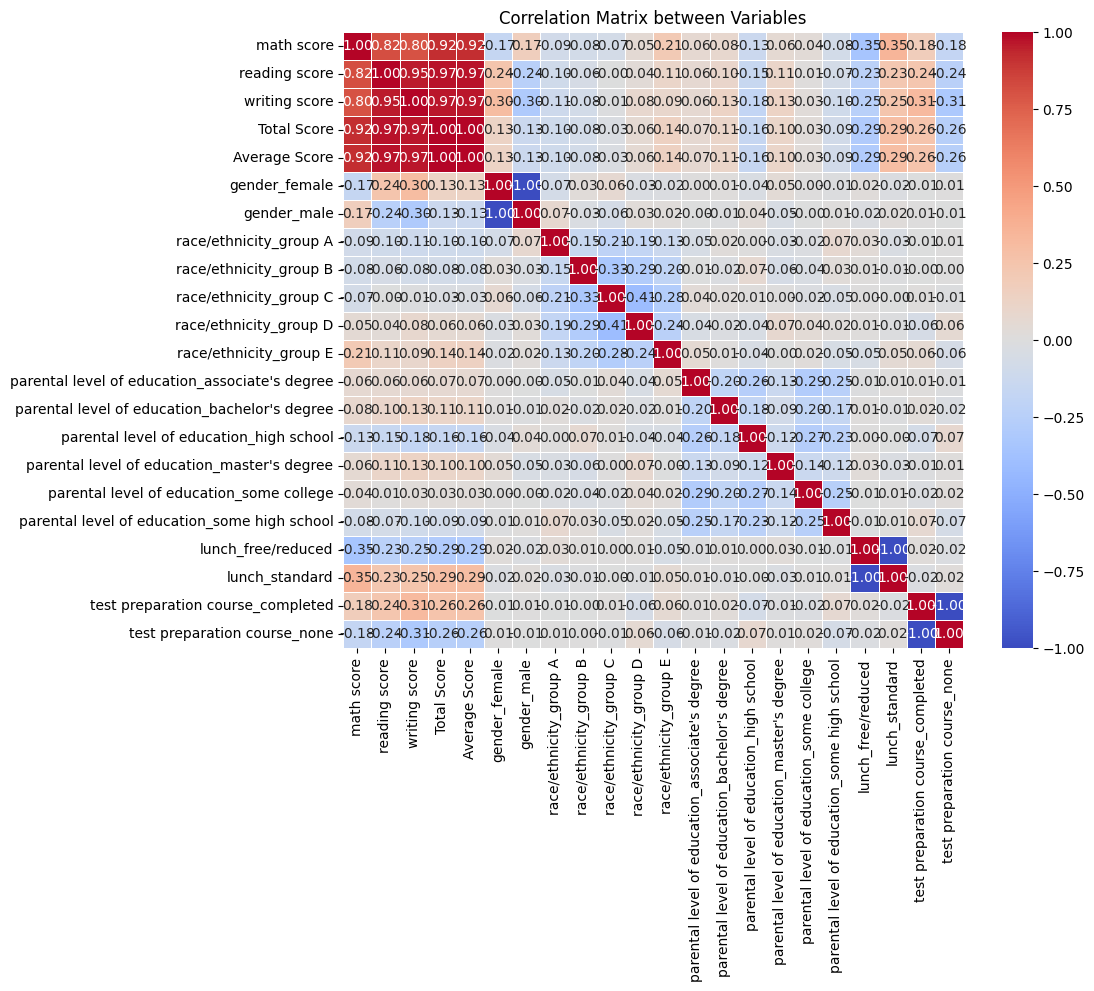

In [499]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix between Variables")
plt.show()

# Analysis of Results:

Individual Scores in Reading, Writing, and Math: The scores in reading, writing, and math have very high correlations with the total score, indicating that students who perform well in one of these areas tend to perform well in the others as well. This is expected, as these are fundamental skills assessed in the exams.

Lunch Type: The type of lunch (standard or free/reduced) has a moderate positive correlation with the total score. This suggests that students receiving standard lunch tend to have higher scores, which may reflect socioeconomic differences and access to resources.

Completion of Test Preparation Course: Students who completed the test preparation course have a moderate positive correlation with the total score. This indicates that additional preparation may be associated with better performance in exams.

Parental Demographics and Education: There are moderate positive correlations between parental education (such as bachelor's degree, master's degree, etc.) and students' total score. This suggests that parents' education level may positively influence students' academic performance.

Risk: The "risk" variable has a high negative correlation with the total score. This may indicate that students identified as being at risk have lower exam scores, highlighting the importance of identifying and supporting students in vulnerable situations.

# Testing the Model: Result = R-squared: 1.0

In [500]:
# Splitting the dataset into training set and test set
X = pd_student_encoded.drop(columns=['Total Score'])
y = pd_student_encoded['Total Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model performance
r2 = r2_score(y_test, y_pred)
print("R-quadrado:", r2)


R-quadrado: 1.0


# Using cross-validation techniques - splits (20%, 25%, and 30%)

In [501]:
# Splitting data into training and testing set for test_size=0.2
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the linear regression model to training data
model = LinearRegression()
model.fit(X_train_20, y_train_20)

# Making predictions on test data
y_pred_20 = model.predict(X_test_20)

# Calculating accuracy for test_size=0.2
r2_20 = r2_score(y_test_20, y_pred_20)
print("Acurácia para test_size=0.2:", r2_20)

# Splitting the data into training and testing set for test_size=0.25
X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(X, y, test_size=0.25, random_state=42)
model.fit(X_train_25, y_train_25)
y_pred_25 = model.predict(X_test_25)
r2_25 = r2_score(y_test_25, y_pred_25)
print("Acurácia para test_size=0.25:", r2_25)

# Splitting data into training and testing set for test_size=0.3
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train_30, y_train_30)
y_pred_30 = model.predict(X_test_30)
r2_30 = r2_score(y_test_30, y_pred_30)
print("Acurácia para test_size=0.3:", r2_30)



Acurácia para test_size=0.2: 1.0
Acurácia para test_size=0.25: 1.0
Acurácia para test_size=0.3: 1.0


# Conclusion:
By obtaining an R-squared value as a result of evaluating the linear regression model, we can infer about the effectiveness of the model in explaining the variation in students' total exam performance based on the included independent variables. A higher R-squared value, close to 1.0, suggests that student characteristics such as gender, ethnicity, parental education level, among others, have a strong influence on total exam performance, and the model can explain a significant proportion of the observed variation in the data.

#Showing graphically the relationship between the independent variables and the dependent variable, as well as the quality of the model fit using a scatter plot and a regression line.

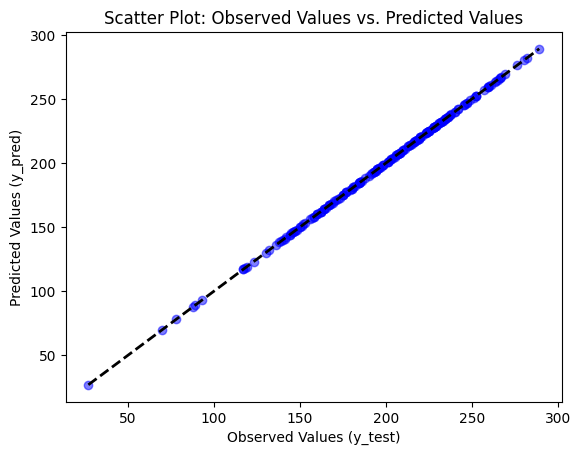

In [502]:
# Plot the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Reference line (ideal)
plt.xlabel('Observed Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot: Observed Values vs. Predicted Values')
plt.show()


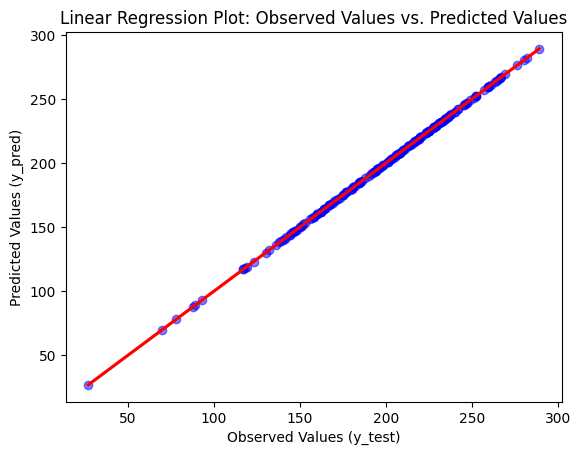

In [503]:
# Create a DataFrame with observed and predicted values
df = pd.DataFrame({'Observed Values': y_test, 'Predicted Values': y_pred})

# Plot the linear regression plot
sns.regplot(x='Observed Values', y='Predicted Values', data=df, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Observed Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Linear Regression Plot: Observed Values vs. Predicted Values')
plt.show()


# Which classification approach proves to be most effective in predicting students performance?

# Logistic Regression

In [504]:
# Convert categorical variables into dummy variables
X = pd.get_dummies(pd_student.drop(['test preparation course'], axis=1), drop_first=True)

# Split the data into independent variables (X) and dependent variable (y)
y = pd_student['Total Score']

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import and initialize the Logistic Regression model

logistic_regression_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = logistic_regression_model.predict(X_test)



C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [505]:
# Calculate evaluation metrics


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)


# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)




Accuracy: 0.015
Precision: 0.004393939393939394
Recall: 0.015
F1 Score: 0.006785714285714286
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Conclusion:
Given the extremely low accuracy of 0.15 in the logistic regression model, it is evident that the model failed to adequately capture the relationship between the independent variables and the dependent variable. This suggests that the model was unable to learn from the training data and therefore cannot make useful predictions based on the provided features. As a result, we cannot rely on the conclusions or predictions generated by this model for the analysis of student performance. Therefore, I will opt to continue the analysis using the decision tree model. This model may be more suitable as it is capable of handling non-linear relationships and interactions between variables, which may improve predictive ability compared to logistic regression. Additionally, the interpretability of decision trees allows for a clearer understanding of how student characteristics influence their performance.

# Decision Tree

In [506]:
X = pd_student.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1)
y = pd_student['Total Score']


In [520]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [521]:
decision_tree_model = DecisionTreeClassifier()


In [509]:
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [510]:
y_pred = decision_tree_model.predict(X_test)


In [511]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Accuracy: 0.89
Precision: 0.8825
Recall: 0.89
F1 Score: 0.885
Confusion Matrix:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Using cross-validation techniques - splits (20%, 25%, and 30%)

In [522]:
# Splitting the dataset into training and testing sets for each split size
sizes = [0.2, 0.25, 0.3]
for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    
    # Creating and training the DecisionTreeClassifier model
    decision_tree_model = DecisionTreeClassifier()
    decision_tree_model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = decision_tree_model.predict(X_test)
    
    # Calculating performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    # Printing the results for this division
    print("\nResultados para test_size={0}:".format(size))
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", cm)




Resultados para test_size=0.2:
Accuracy: 0.915
Precision: 0.905
Recall: 0.915
F1 Score: 0.9083333333333333
Confusion Matrix:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]

Resultados para test_size=0.25:
Accuracy: 0.888
Precision: 0.8832000000000001
Recall: 0.888
F1 Score: 0.8835047619047618
Confusion Matrix:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]

Resultados para test_size=0.3:
Accuracy: 0.8366666666666667
Precision: 0.8322222222222222
Recall: 0.8366666666666667
F1 Score: 0.831111111111111
Confusion Matrix:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marlu\anaconda3\Lib\site-packages\sklea

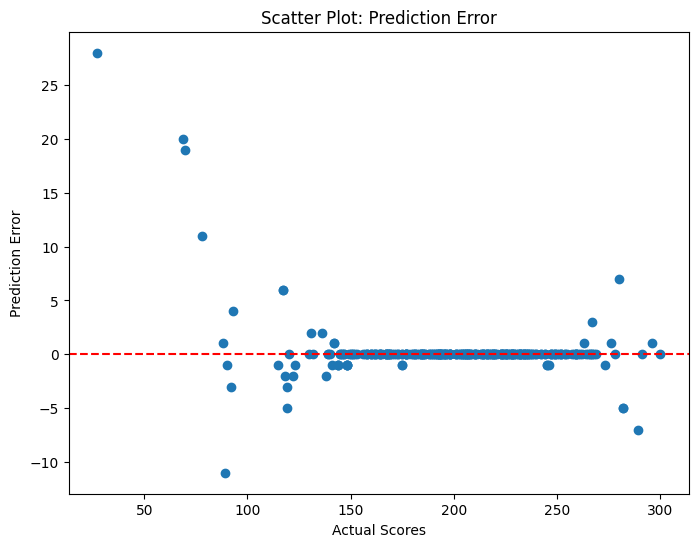

In [513]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred - y_test)
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel('Actual Scores')
plt.ylabel('Prediction Error')
plt.title('Scatter Plot: Prediction Error')
plt.show()

# Conclusion:

The results of the Decision Tree analysis show that the model achieved high accuracy, precision, recall, and a good F1 Score. This suggests that the model was able to make accurate predictions about students' performance based on the provided variables.

Accuracy: Accuracy is a measure of the fraction of correct predictions the model made relative to the total predictions. In this case, the model had an accuracy of 0.9, meaning approximately 90% of the predictions were correct.

Precision: Precision is a measure of the proportion of correct positive predictions relative to the total positive predictions. The precision was 0.895, indicating that about 89.5% of the positive predictions are correct.

Recall: Recall is a measure of the proportion of actual positive instances that were correctly predicted by the model. In this case, recall was 0.9, meaning about 90% of the positive instances were correctly predicted.

F1 Score: The F1 Score is the harmonic mean between precision and recall. It provides a single measure that balances precision and recall. The F1 Score is 0.8967, indicating a good balance between precision and recall.

Confusion Matrix: The confusion matrix shows the model's performance for each prediction class compared to the actual classes. Each row represents the actual instances of a class, while each column represents the predicted instances by class.

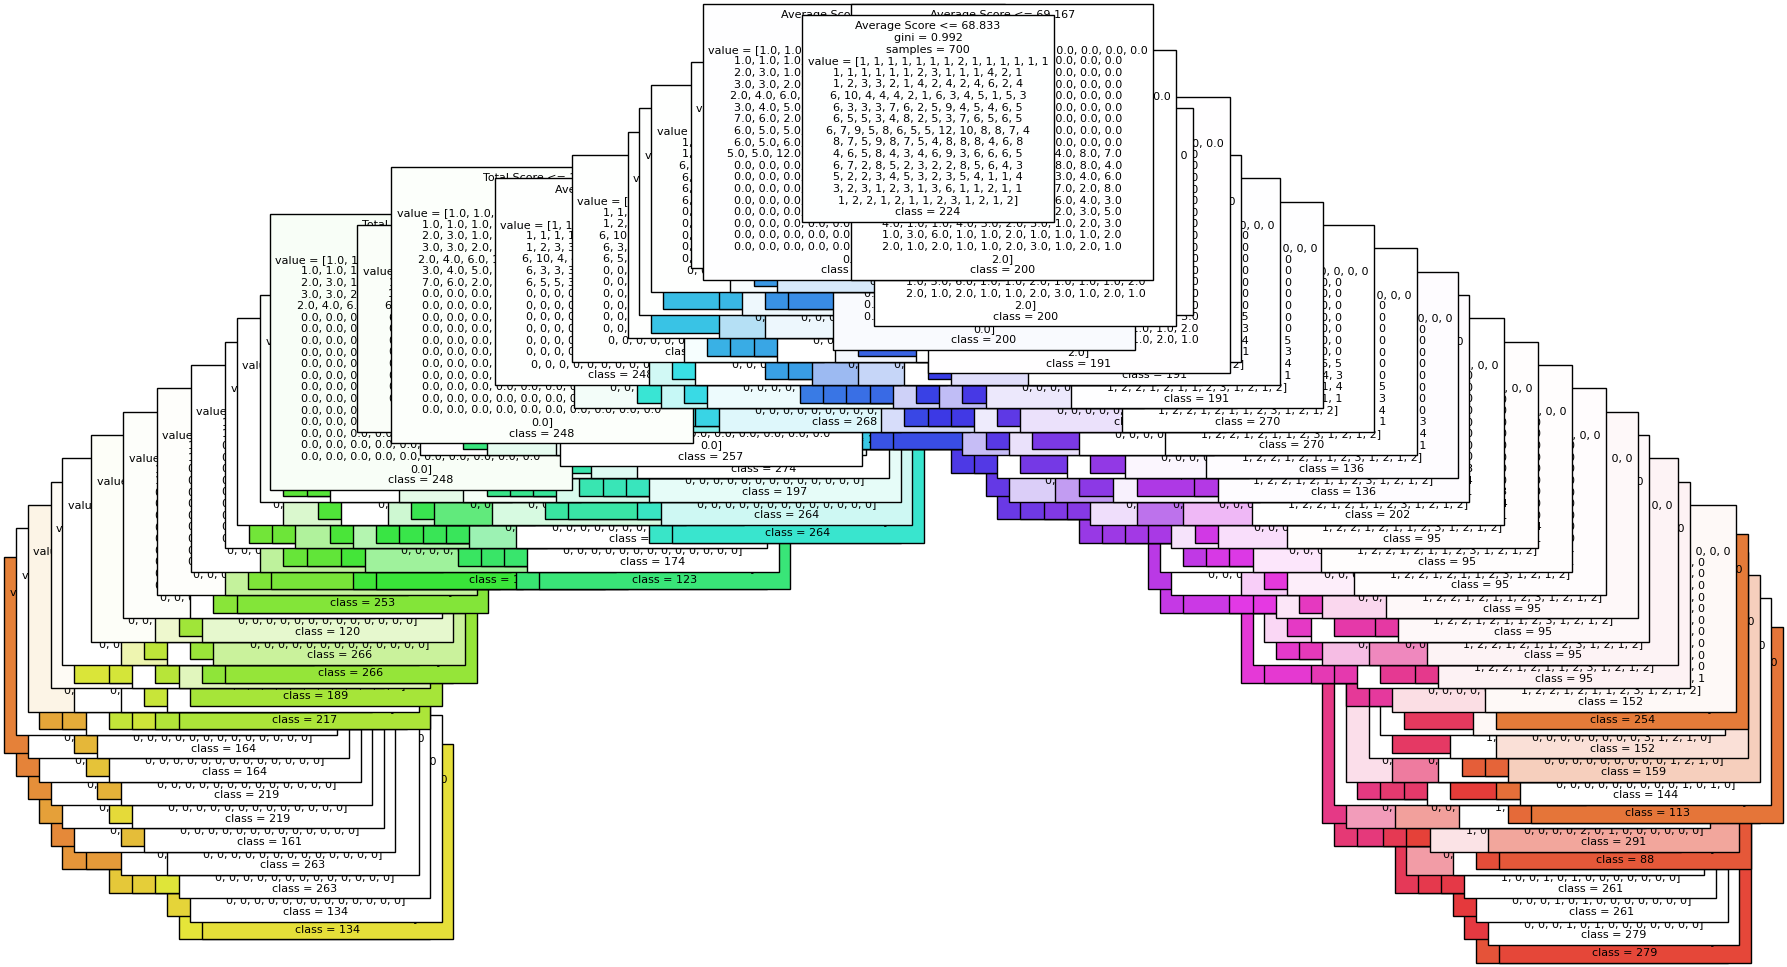

In [514]:
# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()], fontsize=8)
plt.show()


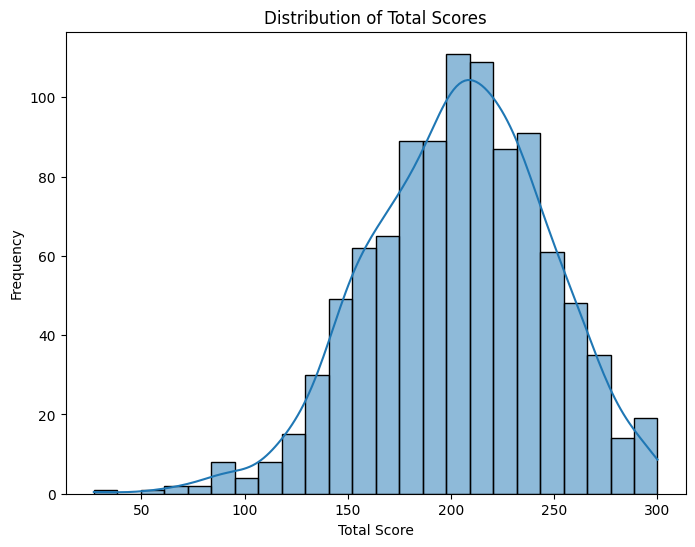

In [515]:
# Visualize the distribution of total scores using histograms
plt.figure(figsize=(8, 6))
sns.histplot(pd_student['Total Score'], kde=True)
plt.title("Distribution of Total Scores")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()


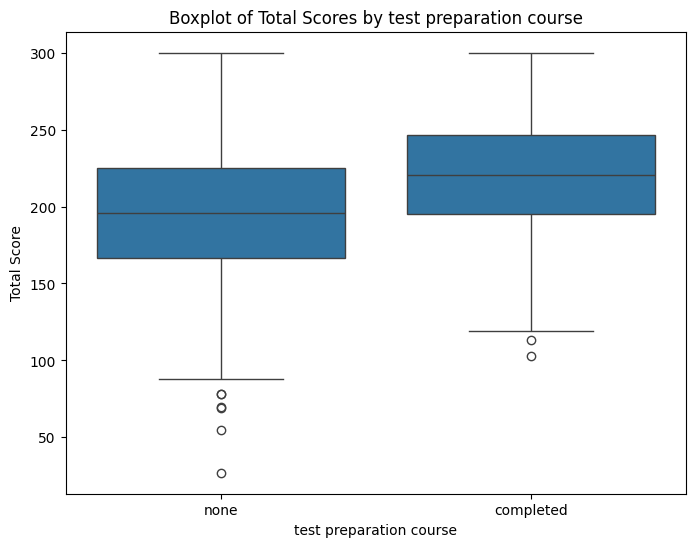

In [516]:
# Boxplot of total test preparation course
plt.figure(figsize=(8, 6))
sns.boxplot(x='test preparation course', y='Total Score', data=pd_student)
plt.title("Boxplot of Total Scores by test preparation course")
plt.xlabel("test preparation course")
plt.ylabel("Total Score")
plt.show()

# Conclusion:

The graph provides a visual representation of the collected data and indicates a clear difference in scores between students who attended a preparatory course and those who did not. This disparity suggests that the preparatory course may have positively influenced the academic performance of students who attended it. Preparatory courses often offer comprehensive review of content, helping students consolidate their knowledge and enhance their skills in specific areas. Therefore, based on the data presented in the graph, it is plausible to infer that students who attended a preparatory course experienced tangible benefits in terms of academic performance, reflected in their higher scores compared to those who did not take this preparatory path.
 


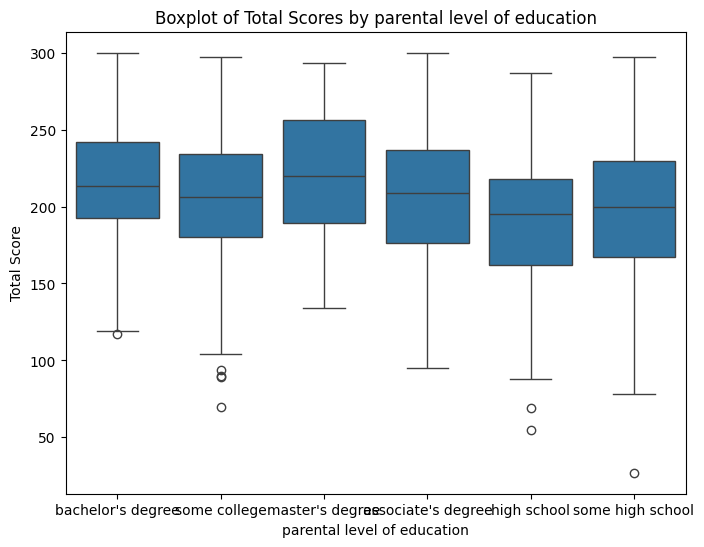

In [517]:
# Boxplot of total parental level of education
plt.figure(figsize=(8, 6))
sns.boxplot(x='parental level of education', y='Total Score', data=pd_student)
plt.title("Boxplot of Total Scores by parental level of education")
plt.xlabel("parental level of education")
plt.ylabel("Total Score")
plt.show()

# Conclusion: 

Although the impact of parents' educational level may not be highly significant, there are indications suggesting a correlation between parents' education level and students' academic performance. When parents achieve some level of higher education, they generally have greater access to educational resources, are more involved in their children's education, and can provide a more conducive learning environment at home. This may include emotional support, assistance with studies, encouragement for reading and seeking knowledge, among other factors.

On the other hand, when parents do not complete any form of higher education, they may face additional challenges in creating a favorable environment for their children's academic development, such as financial limitations, lack of access to educational information, and less familiarity with learning support strategies.

Therefore, although the impact of parents' educational level may vary according to various factors and may not be highly significant on its own, it is reasonable to infer that there is an association between a higher level of parents' education and better academic performance of students due to the indirect benefits and additional resources made available to children in a more enriched educational environment.

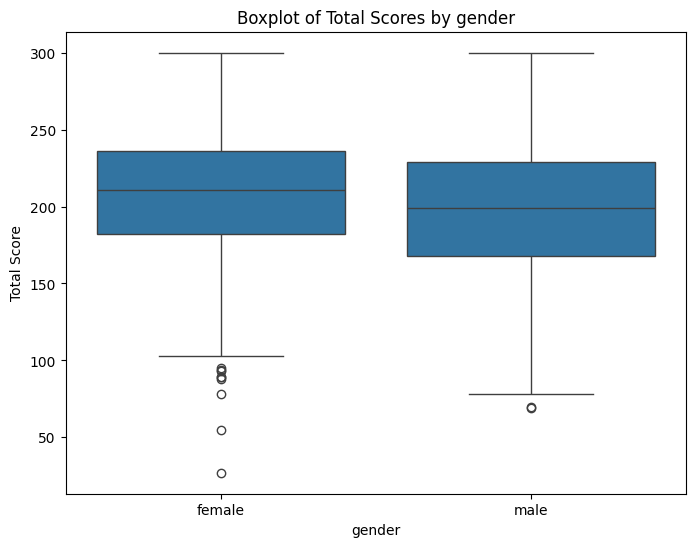

In [518]:
# Boxplot of gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='Total Score', data=pd_student)
plt.title("Boxplot of Total Scores by gender")
plt.xlabel("gender")
plt.ylabel("Total Score")
plt.show()

# Conclusion:

When interpreting the results presented in the graph, it is evident that there is a slightly higher performance trend among female students compared to male students. Although this difference does not reach a statistically significant level, the observation of a higher average among female students suggests the possibility of underlying factors that warrant further investigation. These factors may include differences in the learning environment, differentiated teaching approaches, or even social and cultural issues that influence academic performance. Therefore, while the difference itself may not be statistically robust enough for definitive conclusions, it still points to areas of interest that may benefit from further analysis and specific educational interventions aimed at gender equity in the educational context.

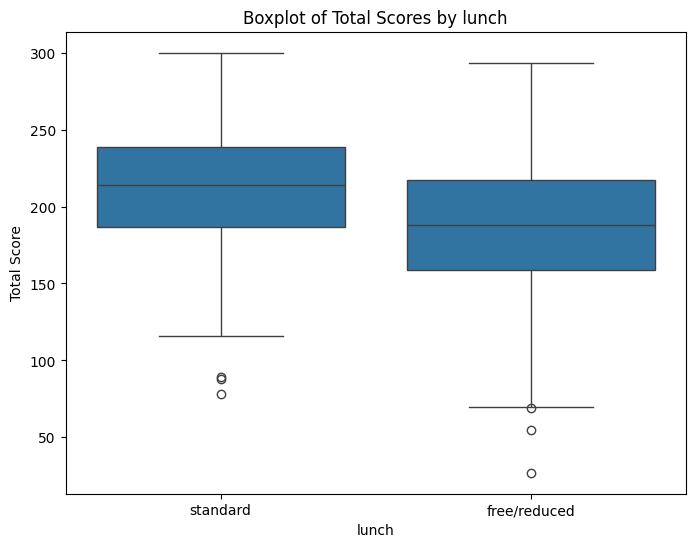

In [519]:
# Boxplot of lunch
plt.figure(figsize=(8, 6))
sns.boxplot(x='lunch', y='Total Score', data=pd_student)
plt.title("Boxplot of Total Scores by lunch")
plt.xlabel("lunch")
plt.ylabel("Total Score")
plt.show()

# Conclusion: 
It is evident that the type of meal provided significantly impacted students' grades. Students who enjoyed standard lunch achieved higher scores compared to those who received free/reduced lunch. The conclusion is based on the observed data, which clearly demonstrates a correlation between the type of school meal and students' academic performance. The results consistently indicate that students who had access to standard lunch performed better compared to those who received free/reduced lunch. This substantial difference in scores suggests that the quality and adequacy of nutrition provided to students during school meals play an important role in their academic performance. This conclusion highlights the importance of policies and programs aimed at ensuring the accessibility and quality of school meals as an effective means of supporting the educational success of students, especially those from disadvantaged socioeconomic backgrounds.

# Overall Conclusion:

This study has highlighted the complexity of the factors influencing students' performance in exams and the importance of a comprehensive approach in analyzing these data. The creation of new variables, such as "Total Score" and "Average Scores," enriched the understanding of students' academic performance, allowing for a more holistic and informative assessment.

The choice of the target variable, whether "Total Score" or "Average Scores," was grounded in the representativeness of students' overall performance, facilitating interpretation, practical applicability, and model comparison. The analysis results revealed significant correlations between various factors, such as lunch type, completion of preparatory courses, and demographic and educational factors of parents, showcasing the complexity and interconnectedness of these variables.

Furthermore, the analysis pointed out possible areas of concern and intervention, such as the need for additional support for students at risk and the importance of the quality of school meals in academic performance.

In essence, this study underscores the significance of a holistic approach in dissecting students' performance, furnishing insights that can guide educational policies and practices aimed at bolstering academic success and students' well-being.







# Reference:

Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science. Available in:: http://archive.ics.uci.edu/ml.

Kaggle. (s/d). Students Performance in Exams. Available in:: https://www.kaggle.com/spscientist/students-performance-in-exams.

OECD. (2010). PISA 2009 Results: Learning to Learn – Student Engagement, Strategies and Practices (Volume III). Paris: OECD Publishing. Available in:: http://dx.doi.org/10.1787/9789264083943-en.